In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import random
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,accuracy_score, confusion_matrix, roc_curve
import nltk

In [76]:
data_train = pd.read_pickle('train_set.pkl')
data_test = pd.read_pickle('test_set.pkl')

In [126]:
import spacy
#nlp = spacy.load("en_core_web_sm")
#comment out as this does not work

In [127]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [66]:
text = data_train.RAW_Text.values[:4]

In [67]:
docs = nlp.pipe(text)

We want to explore how to do it with SpaCy and combined with pandas

In [77]:
text = data_train.Text.values[:4]
docs = nlp.pipe(text)

tokens = []
lemma = []
is_stop = []
lemma_and_stop = []
remove_stop_only = []

for doc in docs:
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        is_stop.append([n.is_stop for n in doc])
        lemma_and_stop.append([n.lemma_ for n in doc if n.is_stop == False])
        remove_stop_only.append([n.text for n in doc if n.is_stop == False])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        is_stop.append(None)
        lemma_and_stop.append(None)
    for token in doc:
        print(f"{str(token)}\t\t{token.lemma_}\t\t{token.is_stop}")


i		i		True
am		be		True
5		5		False
5		5		False
  		  		False
145		145		False
lbs		lbs		False
 		 		False
a		a		True
cup		cup		False
 		 		False
depending		depend		False
on		on		True
the		the		True
style		style		False
of		of		True
the		the		True
shirt		shirt		False
i		i		True
am		be		True
between		between		True
a		a		True
medium		medium		False
and		and		True
a		a		True
small		small		False
at		at		True
retailer		retailer		False
 		 		False
in		in		True
this		this		True
case		case		False
i		i		True
purchased		purchase		False
a		a		True
small		small		False
 		 		False
even		even		True
in		in		True
the		the		True
small		small		False
the		the		True
body		body		False
has		have		True
ample		ample		False
space		space		False
which		which		True
adds		add		False
to		to		True
the		the		True
relax		relax		False
look		look		False
without		without		True
appearing		appear		False
sloppy		sloppy		False
 		 		False
and		and		True
because		because		True
the		the		True
shirt		shirt		False
is		be		True
wide

In [74]:
lemma_and_stop[0]

['5',
 '5',
 '  ',
 '145',
 'lbs',
 ' ',
 'cup',
 ' ',
 'depend',
 'style',
 'shirt',
 'medium',
 'small',
 'retailer',
 ' ',
 'case',
 'purchase',
 'small',
 ' ',
 'small',
 'body',
 'ample',
 'space',
 'add',
 'relax',
 'look',
 'appear',
 'sloppy',
 ' ',
 'shirt',
 'wide',
 'easily',
 'size',
 ' ',
 'shirt',
 'definitely',
 'flirty',
 'fun',
 'great',
 'print',
 ' ',
 'easy',
 'wear',
 'shoulder',
 ' ',
 'invest',
 'retailer',
 ' ',
 'shoulder',
 ' ',
 'design']

In [129]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data (Bag of Words model)


In [90]:
lemma_join = []

for lem in lemma:
    lemma_join.append(" ".join(lem))

In [89]:
" ".join(lemma[0])

'i be 5 5    145 lbs   a cup   depend on the style of the shirt i be between a medium and a small at retailer   in this case i purchase a small   even in the small the body have ample space which add to the relax look without appear sloppy   and because the shirt be wide i would say -PRON- can easily size down   the shirt be definitely flirty and fun with a great print   and easy to wear off of the shoulder   i invest in another retailer top that be also an   off of the shoulder   design but -PRON- do not'

['i be 5 5    145 lbs   a cup   depend on the style of the shirt i be between a medium and a small at retailer   in this case i purchase a small   even in the small the body have ample space which add to the relax look without appear sloppy   and because the shirt be wide i would say -PRON- can easily size down   the shirt be definitely flirty and fun with a great print   and easy to wear off of the shoulder   i invest in another retailer top that be also an   off of the shoulder   design but -PRON- do not',
 'so thin and see thru -PRON- s not even wearable in public   extremely cheap and ill fitting for any price let alone this price   i feel like -PRON- will rip the moment i wear -PRON- out   go back',
 'just buy these today and -PRON- be super soft and beautiful   also   100   cotton   yay   i hate poly    think i should mention though that -PRON- do shrink in the dryer   so unless -PRON- re skinny   -PRON- may want to buy a size up or hang -PRON- to dry and then put in the dryer on

In [94]:
def lemma_and_stop (text):
    docs = nlp.pipe(text)
    tokens = []
    lemma = []
    lemma_and_stop = []

    for doc in docs:
        if doc.is_parsed:
            tokens.append([n.text for n in doc])
            lemma.append(" ".join([n.lemma_ for n in doc]))
            lemma_and_stop.append(" ".join([n.lemma_ for n in doc if n.is_stop == False]))
        else:
            # We want to make sure that the lists of parsed results have the
            # same number of entries of the original Dataframe, so add some blanks in case the parse fails
            tokens.append(None)
            lemma.append(None)
            lemma_and_stop.append(None)
    return tokens,lemma,lemma_and_stop

In [3]:
df = pd.read_pickle('cleaned_df.pkl')

In [112]:
corpus = df.RAW_Text.str.replace(r"\W"," ").str.lower()

In [113]:
corpus_positive = corpus[df.Positively_rated == 1]

In [114]:
corpus_negative = corpus[df.Positively_rated == 0]

In [168]:
sum(df.Positively_rated)

17448

In [169]:
len(df)

22641

In [115]:
corpus_positive = " ".join(corpus_positive)

original_ind
0        Absolutely wonderful   silky and sexy and comf...
1        Love this dress   it s sooo pretty   i happene...
2        I had such high hopes for this dress and reall...
3        I love  love  love this jumpsuit  it s fun  fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes  soft  stre...
23483    This fit well  but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: RAW_Text, Length: 22641, dtype: object

In [116]:
corpus_positive = nltk.Text(nltk.word_tokenize(corpus_positive))

In [117]:
corpus_negative = " ".join(corpus_negative)

In [118]:
corpus_negative = nltk.Text(nltk.word_tokenize(corpus_negative))

In [32]:
from nltk.probability import FreqDist

In [119]:
pos = FreqDist(corpus_positive)

In [121]:
pos.pprint(maxlen=25)

FreqDist({'the': 55681, 'i': 51562, 'and': 38513, 'it': 37289, 'a': 33989, 'is': 24241, 'this': 19675, 'to': 18717, 'in': 15877, 'but': 11941, 'on': 11169, 'for': 10857, 'with': 10853, 'of': 9801, 'so': 9355, 'my': 8599, 'dress': 8036, 'love': 7742, 'that': 7634, 'was': 7232, 'size': 7079, 's': 6994, 'not': 6822, 't': 6277, 'very': 6193, ...})


In [120]:
neg = FreqDist(corpus_negative)

In [122]:
neg.pprint(maxlen=25)

FreqDist({'the': 20485, 'i': 15508, 'it': 11995, 'and': 10496, 'a': 9029, 'is': 6400, 'this': 6087, 'to': 5866, 'was': 4989, 'in': 4846, 'but': 4615, 'on': 4159, 'of': 3628, 'not': 3159, 'for': 3143, 'so': 2668, 't': 2578, 'dress': 2531, 'my': 2429, 'that': 2380, 'like': 2221, 'me': 2119, 'have': 2060, 'very': 2024, 'top': 1964, ...})


In [123]:
stopwords.add('s')
stopwords.add('t')
stopwords.add('m')
stopwords.add('5')

12411

In [143]:
pos_key = [key for key in list(pos.keys()) if key not in stopwords]
neg_key = [key for key in list(neg.keys()) if key not in stopwords]

In [144]:
pos_freq = []
for key in pos_key:
    pos_freq.append((key,pos[key]))

pos_freq_sorted = sorted(pos_freq,key = lambda x: x[1],reverse = True)

In [163]:
df_pos = pd.DataFrame(pos_freq_sorted[:15], columns =['Tag', 'Freq']) 

In [146]:
neg_freq = []
for key in neg_key:
    neg_freq.append((key,neg[key]))

neg_freq_sorted = sorted(neg_freq,key = lambda x: x[1],reverse = True)

In [162]:
neg_tags,neg_freq = zip(*neg_freq_sorted[:15])

In [164]:
df_neg = pd.DataFrame(neg_freq_sorted[:15], columns =['Tag', 'Freq']) 

In [171]:
df_pos['Prct'] = df_pos.Freq/17448
df_neg['Prct'] = df_neg.Freq/(22641-17448)

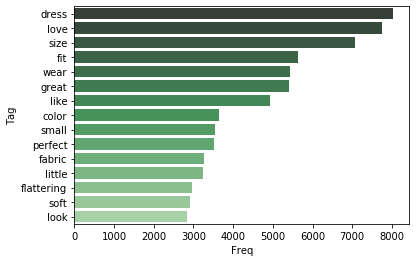

In [180]:
sns.barplot(x="Freq", y="Tag", data=df_pos,palette="Greens_d")
plt.savefig("output\most_freq_pos.png")

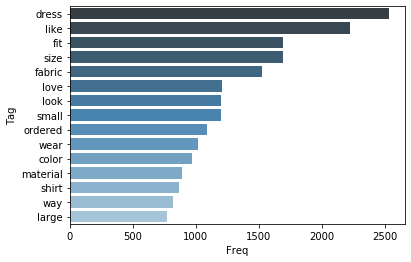

In [179]:
sns.barplot(x="Freq", y="Tag", data=df_neg,palette="Blues_d")
plt.savefig("output\most_freq_neg.png")